In [3]:
import sys
sys.path.append('C:\Files\SearchTree')
from SearchTree import NPuzzleSearchTree
import pyautogui
import time

import random

import pandas as pd
import matplotlib.pyplot as plt

def generate_puzzle():
    # Create a solved 4x4 grid
    grid = [[4*j+i+1 for i in range(4)] for j in range(4)]
    grid[3][3] = 0  # Replace last element with 0 (blank tile)

    # Shuffle the grid by making random moves
    for _ in range(10):
        possible_moves = []
        row, col = find_blank(grid)
        if row > 0:
            possible_moves.append((row - 1, col))  # Move blank tile up
        if row < 3:
            possible_moves.append((row + 1, col))  # Move blank tile down
        if col > 0:
            possible_moves.append((row, col - 1))  # Move blank tile left
        if col < 3:
            possible_moves.append((row, col + 1))  # Move blank tile right
        new_row, new_col = random.choice(possible_moves)
        grid[row][col], grid[new_row][new_col] = grid[new_row][new_col], grid[row][col]

    # Convert grid to the desired format and return
    return [[grid[i][j] for j in range(4)] for i in range(4)]

def find_blank(grid):
    size = len(grid) #Square grid only
    for row in range(size):
        for col in range(size):
            if grid[row][col]==0: return row, col


In [4]:
algList=['A*', 'BFS', 'DFS', 'GreedyBFS']
statList=["iterations", "time", "expNodes", "maxNodes", "Depth"]
iteractionsLimit=5000

tests = []

In [58]:
for i in range(10000):
    #stores every test as a list of dictionaries, one for each algorithm. 
    test=[]

    print("iteration: "+str(i))

    puzzle = generate_puzzle()

    for alg in algList:
        #print("Solving with: " + alg)

        tree = NPuzzleSearchTree(puzzle)
        result = tree.find(searchtype=alg, avoidRepeat="path",print_steps=False,  iteractionsLimit=iteractionsLimit)
        

        if result == None:
            pass
            #print("No solution found")
        else:
            #print("Solution found at depth: "+str(result["Depth"])+". with "+str(result["iterations"])+" iterations")
            result['Algorithm']=alg
            del result['path']

        test.append(result)

    tests.append(test)


iteration: 0
Max iterations reached
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
Max iterations reached
iteration: 7
Max iterations reached
iteration: 8
iteration: 9
Max iterations reached
iteration: 10
Max iterations reached
iteration: 11
Max iterations reached
Max iterations reached
iteration: 12
iteration: 13
Max iterations reached
iteration: 14
Max iterations reached
iteration: 15
Max iterations reached
iteration: 16
Max iterations reached
iteration: 17
iteration: 18
Max iterations reached
iteration: 19
iteration: 20
Max iterations reached
iteration: 21
iteration: 22
Max iterations reached
iteration: 23
Max iterations reached
iteration: 24
iteration: 25
Max iterations reached
iteration: 26
Max iterations reached
iteration: 27
Max iterations reached
iteration: 28
iteration: 29
Max iterations reached
iteration: 30
iteration: 31
Max iterations reached
iteration: 32
iteration: 33
Max iterations reached
iteration: 34
Max iterations reached
iteration: 35


KeyboardInterrupt: 

In [83]:
#Save results to file
import json
with open('data.json', 'w') as file:
    json.dump(tests, file)

In [75]:
# Load data from file
import json
path="C:\\Files\\SearchTree\\Other\\results.json"
with open(path, 'r') as file:
    tests = json.load(file)

print(f'loaded {len(tests)} tests')

loaded 2000 tests


In [84]:
n=10000
res={}

for alg in algList:
    res[alg]=0

for run in tests:
    if run==None: continue
    for alg in algList:
        if run['Algorithm']==alg:
            res[alg]+=1

for key, val in res.items():
    print(f'{key}: {val/n*100:.2f}%')

A*: 6.40%
BFS: 0.00%
DFS: 0.00%
GreedyBFS: 5.00%


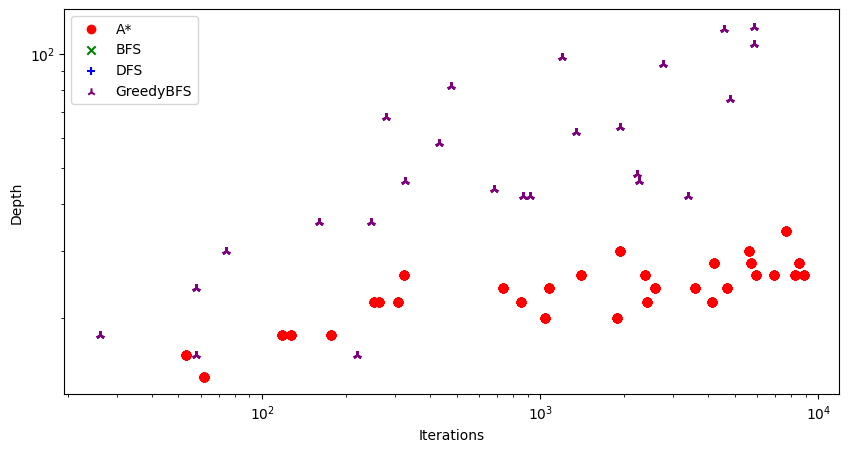

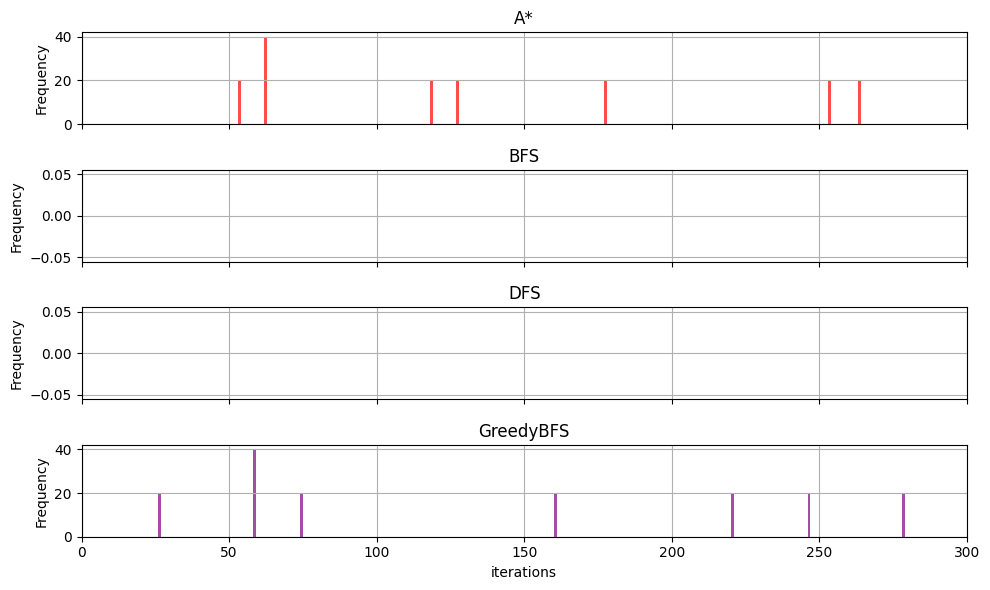

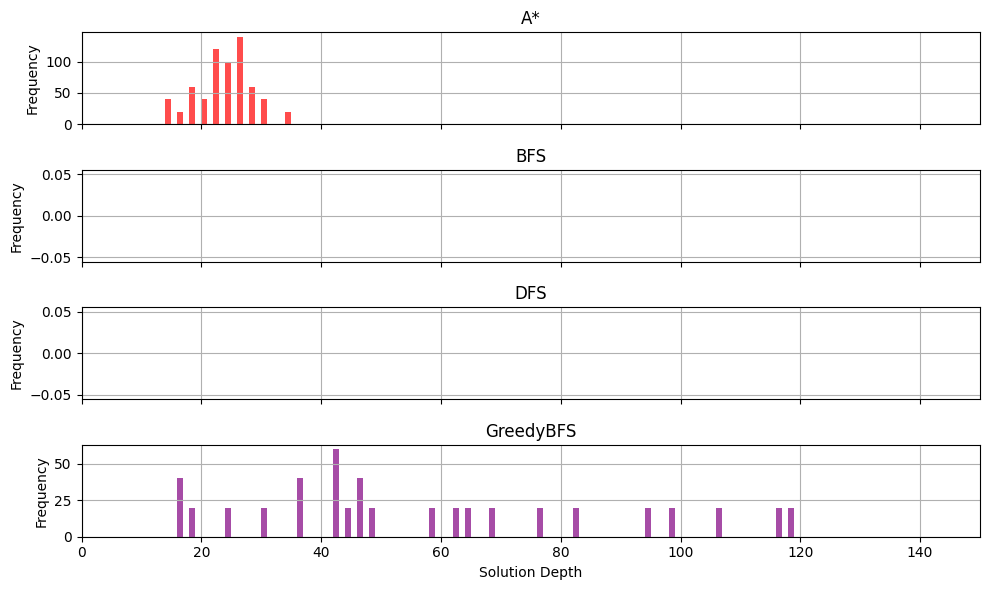

In [82]:
#Plot the results
plt.rcParams['figure.figsize'] = [10, 5]

#scatter plot
data = tests

algorithms = algList
colors = ['red', 'green', 'blue', 'purple']
markers = ['o', 'x', '+', '2']

iterations_data={}
depth_data={}

for alg in algList:
    iterations_data[alg]=[]
    depth_data[alg]=[]

#extract the iterations and depth for each run
for run in tests:
    if run==None: continue #some runs return an error (None), skip those
    alg=run['Algorithm']
    iterations_data[alg].append(run['iterations'])
    depth_data[alg].append(run['Depth'])

#plot iterations vs solution depth
for i, algorithm in enumerate(algorithms):
    #if algorithm=='A*': continue
    plt.scatter(iterations_data[algorithm], depth_data[algorithm], color=colors[i], label=algorithm, marker=markers[i])

plt.ylabel('Depth')
plt.xlabel('Iterations')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('iter vs depth.png')
plt.show()


#plot iterations histogram

# Plotting the histograms stacked vertically
fig, axs = plt.subplots(len(algorithms), 1, figsize=(10, 6), sharex=True)

for i, algorithm in enumerate(algorithms):
    axs[i].hist(iterations_data[algorithm], bins=range(0, 1000, 1), alpha=0.7, color=colors[i])
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'{algorithm}')
    axs[i].grid(True)

plt.xlabel('iterations')
plt.xlim(0, 300)
plt.tight_layout()
plt.savefig('iterations.png')
plt.show()


#plot solution depth

# Extract 'depth' for each algorithm from the filtered data

# Plotting the histograms stacked vertically
fig, axs = plt.subplots(len(algorithms), 1, figsize=(10, 6), sharex=True)

for i, algorithm in enumerate(algorithms):
    axs[i].hist(depth_data[algorithm], bins=range(0, 301, 1), alpha=0.7, color=colors[i])
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'{algorithm}')
    axs[i].grid(True)

plt.xlabel('Solution Depth')
plt.xlim(0, 150)
plt.tight_layout()
plt.savefig('depth.png')
plt.show()

